# Notes

15-June-2016

Geospatial data of cycle routes obtained with an app from Strava, a fitness tech company. This notebook contains an initial exploration of that data. 

The data is given in GPX format, an XML like file format for geospatial data. Inital data was collected by Phil, Agne and Peter over the dates 13 - 15 June 2016. It will be periodically updated.

Initial ideas for this analysis include creating an interactive map of all bike routes, colored by person. A time lapsed movie could also be made to show the progression of routes over time.

There is low volume of data at this point. At best, we can attempt to give an impression of what a more extensive  data collection effort would give.


16-June-2016

Tasks:
* Revise visualizations to be colored by user.
* Add Sarah's data
* Make a movie of points over time

In [81]:
#pip install gpxpy
#pip install folium
%matplotlib inline

# Parse GPX data

In [82]:
from os import listdir
from os.path import isfile, join
import gpxpy

data_path = '../data/raw/geo/'
data = [f for f in listdir(data_path) if isfile(join(data_path,f)) and f != "README.docx"]

lat, lon = [], []

In [83]:
users = [y.split("_")[1] for y in [x.replace('.gpx', '') for x in data]]
colors = {'phil': 'blue', 
          'agne': 'red', 
          'peter': 'green',
          'sarah': 'purple'}

In [84]:
for activity in data:
    gpx_filename = join(data_path,activity)
    
    with open(gpx_filename, 'r') as f:
        gpx = gpxpy.parse(f)

    activity_lat, activity_lon = [], []
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                activity_lat.append(point.latitude)
                activity_lon.append(point.longitude)
    lat.append(activity_lat)
    lon.append(activity_lon)

# Visualization I
* [Visualizing Strava Tracks with Python](http://andykee.com/visualizing-strava-tracks-with-python.html)

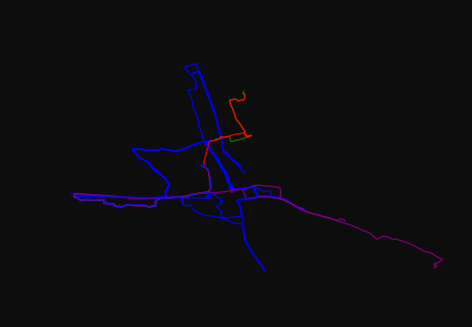

In [85]:
fig = plt.figure(facecolor = '0.05')
ax = plt.Axes(fig, [0., 0., 1., 1.], )
ax.set_aspect('equal')
ax.set_axis_off()
fig.add_axes(ax)

#Plot each activity separately. Else, get connected lines
for activity_lon, activity_lat, user in zip(lon, lat, users):
    plt.plot(activity_lon, activity_lat, color = colors[user], lw = 1.5, alpha = 0.8)

# Visualization II
* [deparkes/GPX_Folium_Map.py](https://gist.github.com/deparkes/610b112f74eadbda663806ba8dd83069)
* [Trackprofiler](http://www.trackprofiler.com/)
* [folium - custom color icons](http://nbviewer.jupyter.org/github/birdage/folium/blob/color_markers/examples/marker_color_icon_examples.ipynb)

In [86]:
import folium

In [88]:
# Load map centred on Oxford
ox = folium.Map(location=[51.7520, -1.2577], zoom_start=13)

for activity_lon, activity_lat, user in zip(lon, lat, users):
    for i, (x,y) in enumerate(zip(activity_lon, activity_lat)):
        #Map rendering is slow. Thin points. 
        if i % 10 == 0:
            ox.add_child(folium.CircleMarker([y, x], radius=10, 
                                             fill_opacity = 1.0,
                                             fill_color=colors[user], 
                                             color='white', 
                         ))

ox

In [ ]:
# Save map
#uk.save("./figures/20160615-leaflet.html")